In [ ]:
! pip install geopandas
! pip install pandas_profiling
! pip install ipywidgets
! pip install widgetsnbextension

In [ ]:
import numpy as np
import pandas as pd
import geopandas as gpd
import numpy as np
import seaborn as sns
import textwrap
%matplotlib inline 
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
covid19_df = pd.read_csv(r"/content/gdrive/Shareddrives/Dataset/covid_19_indonesia_time_series_all.csv")
covid19_df.tail(5)

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,City or Regency,Province,Country,Continent,Island,Time Zone,Special Status,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
9954,12/31/2020,ID-SG,Sulawesi Tenggara,38,0,24,14,7907,147,6696,1064,Province,NaN,Sulawesi Tenggara,Indonesia,Asia,Sulawesi,UTC+08:00,NaN,15,2.0,219,377.0,1911.0,38068,2635461,69.23,122.070311,-4.124689,14.42,3000.23,0.00,55.78,1.86%,84.68%,0.60,0.00
9955,12/31/2020,ID-SA,Sulawesi Utara,88,1,0,87,9671,310,7003,2358,Province,NaN,Sulawesi Utara,Indonesia,Asia,Sulawesi,UTC+08:00,NaN,11,4.0,171,332.0,1507.0,13892,2641884,190.17,124.521240,1.259638,33.31,3660.65,0.38,117.34,3.21%,72.41%,2.59,0.25
9956,12/31/2020,ID-SB,Sumatera Barat,117,3,26,88,23464,522,18030,4912,Province,NaN,Sumatera Barat,Indonesia,Asia,Sumatera,UTC+07:00,NaN,12,7.0,179,230.0,928.0,42013,5519245,131.37,100.465062,-0.850253,21.20,4251.31,0.54,94.58,2.22%,76.84%,0.94,3.00
9957,12/31/2020,ID-SS,Sumatera Selatan,92,1,50,41,11826,599,9364,1863,Province,NaN,Sumatera Selatan,Indonesia,Asia,Sumatera,UTC+07:00,NaN,13,4.0,241,387.0,2853.0,91592,8217551,89.72,104.169465,-3.216212,11.20,1439.11,0.12,72.89,5.07%,79.18%,0.84,0.50
9958,12/31/2020,ID-SU,Sumatera Utara,83,0,82,1,18149,679,15403,2067,Province,NaN,Sumatera Utara,Indonesia,Asia,Sumatera,UTC+07:00,NaN,25,8.0,450,693.0,5417.0,72981,14874889,203.82,99.051964,2.191894,5.58,1220.11,0.00,45.65,3.74%,84.87%,0.93,0.00


In [ ]:
covid19_df.info()
covid19_df[0:10]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9959 entries, 0 to 9958
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         9959 non-null   object 
 1   Location ISO Code            9959 non-null   object 
 2   Location                     9959 non-null   object 
 3   New Cases                    9959 non-null   int64  
 4   New Deaths                   9959 non-null   int64  
 5   New Recovered                9959 non-null   int64  
 6   New Active Cases             9959 non-null   int64  
 7   Total Cases                  9959 non-null   int64  
 8   Total Deaths                 9959 non-null   int64  
 9   Total Recovered              9959 non-null   int64  
 10  Total Active Cases           9959 non-null   int64  
 11  Location Level               9959 non-null   object 
 12  City or Regency              0 non-null      float64
 13  Province          

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,City or Regency,Province,Country,Continent,Island,Time Zone,Special Status,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,489,20,39,430,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,45.09,0.00,1.84,4.09%,7.98%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,491,20,39,432,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,45.27,0.00,1.84,4.07%,7.94%,1.00,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,2,Country,NaN,NaN,Indonesia,Asia,NaN,NaN,NaN,416,98.0,7230,8488.0,74953.0,1916907,265185520,138.34,113.921327,-0.789275,0.01,0.01,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-JB,Jawa Barat,3,0,0,3,12,5,120,-113,Province,NaN,Jawa Barat,Indonesia,Asia,Jawa,UTC+07:00,NaN,18,9.0,627,645.0,5312.0,35378,45161325,1276.55,107.603708,-6.920432,0.07,0.27,0.00,0.11,41.67%,1000.00%,NaN,NaN
4,3/2/2020,ID-RI,Riau,1,0,0,1,2,1,1,0,Province,NaN,Riau,Indonesia,Asia,Sumatera,UTC+07:00,NaN,10,2.0,169,268.0,1591.0,87024,6074100,69.80,101.805109,0.511648,0.16,0.33,0.00,0.16,50.00%,50.00%,NaN,NaN
5,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,493,20,39,434,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,45.45,0.00,1.84,4.06%,7.91%,1.00,1.0
6,3/3/2020,IDN,Indonesia,0,0,0,0,2,0,0,2,Country,NaN,NaN,Indonesia,Asia,NaN,NaN,NaN,416,98.0,7230,8488.0,74953.0,1916907,265185520,138.34,113.921327,-0.789275,0.00,0.01,0.00,0.00,0.00%,0.00%,0.00,1.0
7,3/3/2020,ID-JB,Jawa Barat,1,1,0,0,13,6,120,-113,Province,NaN,Jawa Barat,Indonesia,Asia,Jawa,UTC+07:00,NaN,18,9.0,627,645.0,5312.0,35378,45161325,1276.55,107.603708,-6.920432,0.02,0.29,0.02,0.13,46.15%,923.08%,0.33,NaN
8,3/3/2020,ID-RI,Riau,0,0,0,0,2,1,1,0,Province,NaN,Riau,Indonesia,Asia,Sumatera,UTC+07:00,NaN,10,2.0,169,268.0,1591.0,87024,6074100,69.80,101.805109,0.511648,0.00,0.33,0.00,0.16,50.00%,50.00%,0.00,1.0
9,3/4/2020,ID-JK,DKI Jakarta,2,0,0,2,495,20,39,436,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,45.64,0.00,1.84,4.04%,7.88%,1.00,1.0


copy dataset

In [ ]:
covid_new = covid19_df.copy()
covid_new.head(5)


,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,City or Regency,Province,Country,Continent,Island,Time Zone,Special Status,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,489,20,39,430,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,45.09,0.0,1.84,4.09%,7.98%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,491,20,39,432,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,45.27,0.0,1.84,4.07%,7.94%,1.0,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,2,Country,NaN,NaN,Indonesia,Asia,NaN,NaN,NaN,416,98.0,7230,8488.0,74953.0,1916907,265185520,138.34,113.921327,-0.789275,0.01,0.01,0.0,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-JB,Jawa Barat,3,0,0,3,12,5,120,-113,Province,NaN,Jawa Barat,Indonesia,Asia,Jawa,UTC+07:00,NaN,18,9.0,627,645.0,5312.0,35378,45161325,1276.55,107.603708,-6.920432,0.07,0.27,0.0,0.11,41.67%,1000.00%,NaN,NaN
4,3/2/2020,ID-RI,Riau,1,0,0,1,2,1,1,0,Province,NaN,Riau,Indonesia,Asia,Sumatera,UTC+07:00,NaN,10,2.0,169,268.0,1591.0,87024,6074100,69.80,101.805109,0.511648,0.16,0.33,0.0,0.16,50.00%,50.00%,NaN,NaN


melakukan drop kolom yang tidak berguna

In [ ]:
covid_new.drop(["Location ISO Code", "New Cases", "New Deaths", "New Recovered", "New Active Cases", "Province", "Country", "Continent", "Island", "Time Zone", 
                "Special Status", "Total Regencies", "Total Cities", "Total Districts", "Total Urban Villages", "Total Rural Villages", "Area (km2)", 
                "New Cases per Million", "Total Cases per Million","New Deaths per Million", "Total Deaths per Million", "Case Fatality Rate",
                "Case Recovered Rate", "Growth Factor of New Cases","Growth Factor of New Deaths", "City or Regency"],axis=1,inplace=True)

In [ ]:
covid_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9959 entries, 0 to 9958
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                9959 non-null   object 
 1   Location            9959 non-null   object 
 2   Total Cases         9959 non-null   int64  
 3   Total Deaths        9959 non-null   int64  
 4   Total Recovered     9959 non-null   int64  
 5   Total Active Cases  9959 non-null   int64  
 6   Location Level      9959 non-null   object 
 7   Population          9959 non-null   int64  
 8   Population Density  9959 non-null   float64
 9   Longitude           9959 non-null   float64
 10  Latitude            9959 non-null   float64
dtypes: float64(3), int64(5), object(3)
memory usage: 856.0+ KB


drop data yang double pada kolom Location untuk mendapat update terakhir

In [ ]:
covid_final = covid_new.drop_duplicates(subset='Location', keep="last")
covid_final

,Date,Location,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,Population,Population Density,Longitude,Latitude
9924,12/31/2020,Aceh,8746,358,7148,1240,Province,5247257,90.54,96.910522,4.225615
9925,12/31/2020,Bali,17593,466,12477,4650,Province,4216171,729.43,115.131714,-8.369472
9926,12/31/2020,Banten,18170,404,10209,7557,Province,10722374,1109.64,106.109004,-6.456736
9927,12/31/2020,Bengkulu,3603,111,2560,932,Province,1999539,100.38,102.338421,-3.533584
9928,12/31/2020,DKI Jakarta,183735,3270,164776,15689,Province,10846145,16334.31,106.836118,-6.204699
9929,12/31/2020,Daerah Istimewa Yogyakarta,12155,260,8176,3719,Province,3631015,1158.90,110.444878,-7.894502
9930,12/31/2020,Gorontalo,3841,101,3308,432,Province,1180651,104.88,122.376058,0.687003
9931,12/31/2020,Indonesia,743198,22138,611097,109963,Country,265185520,138.34,113.921327,-0.789275
9932,12/31/2020,Jambi,3227,55,2319,853,Province,3493357,69.79,102.723640,-1.697698
9933,12/31/2020,Jawa Barat,83579,1172,70896,11511,Province,45161325,1276.55,107.603708,-6.920432


In [ ]:
prov = gpd.read_file('/content/gdrive/Shareddrives/Dataset/prov.shp', sep=',')
prov
prov.drop(["NAME_0"],axis=1,inplace=True)
prov.rename(columns = {"NAME_1":"Provinsi"}, inplace = True)
prov['Provinsi'].replace({"Jakarta Raya":"DKI Jakarta"},inplace=True)

mengganti nama kolom Location menjadi Provinsi

In [ ]:
covid_final.rename(columns={
    'Location':'Provinsi'
},inplace=True)
covid_final

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Date,Provinsi,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,Population,Population Density,Longitude,Latitude
9924,12/31/2020,Aceh,8746,358,7148,1240,Province,5247257,90.54,96.910522,4.225615
9925,12/31/2020,Bali,17593,466,12477,4650,Province,4216171,729.43,115.131714,-8.369472
9926,12/31/2020,Banten,18170,404,10209,7557,Province,10722374,1109.64,106.109004,-6.456736
9927,12/31/2020,Bengkulu,3603,111,2560,932,Province,1999539,100.38,102.338421,-3.533584
9928,12/31/2020,DKI Jakarta,183735,3270,164776,15689,Province,10846145,16334.31,106.836118,-6.204699
9929,12/31/2020,Daerah Istimewa Yogyakarta,12155,260,8176,3719,Province,3631015,1158.90,110.444878,-7.894502
9930,12/31/2020,Gorontalo,3841,101,3308,432,Province,1180651,104.88,122.376058,0.687003
9931,12/31/2020,Indonesia,743198,22138,611097,109963,Country,265185520,138.34,113.921327,-0.789275
9932,12/31/2020,Jambi,3227,55,2319,853,Province,3493357,69.79,102.723640,-1.697698
9933,12/31/2020,Jawa Barat,83579,1172,70896,11511,Province,45161325,1276.55,107.603708,-6.920432


penggabungan 2 dataset

In [ ]:
covid_peta = prov.merge(covid_final.sort_values(by='Provinsi'),on='Provinsi')


Pembuatan peta

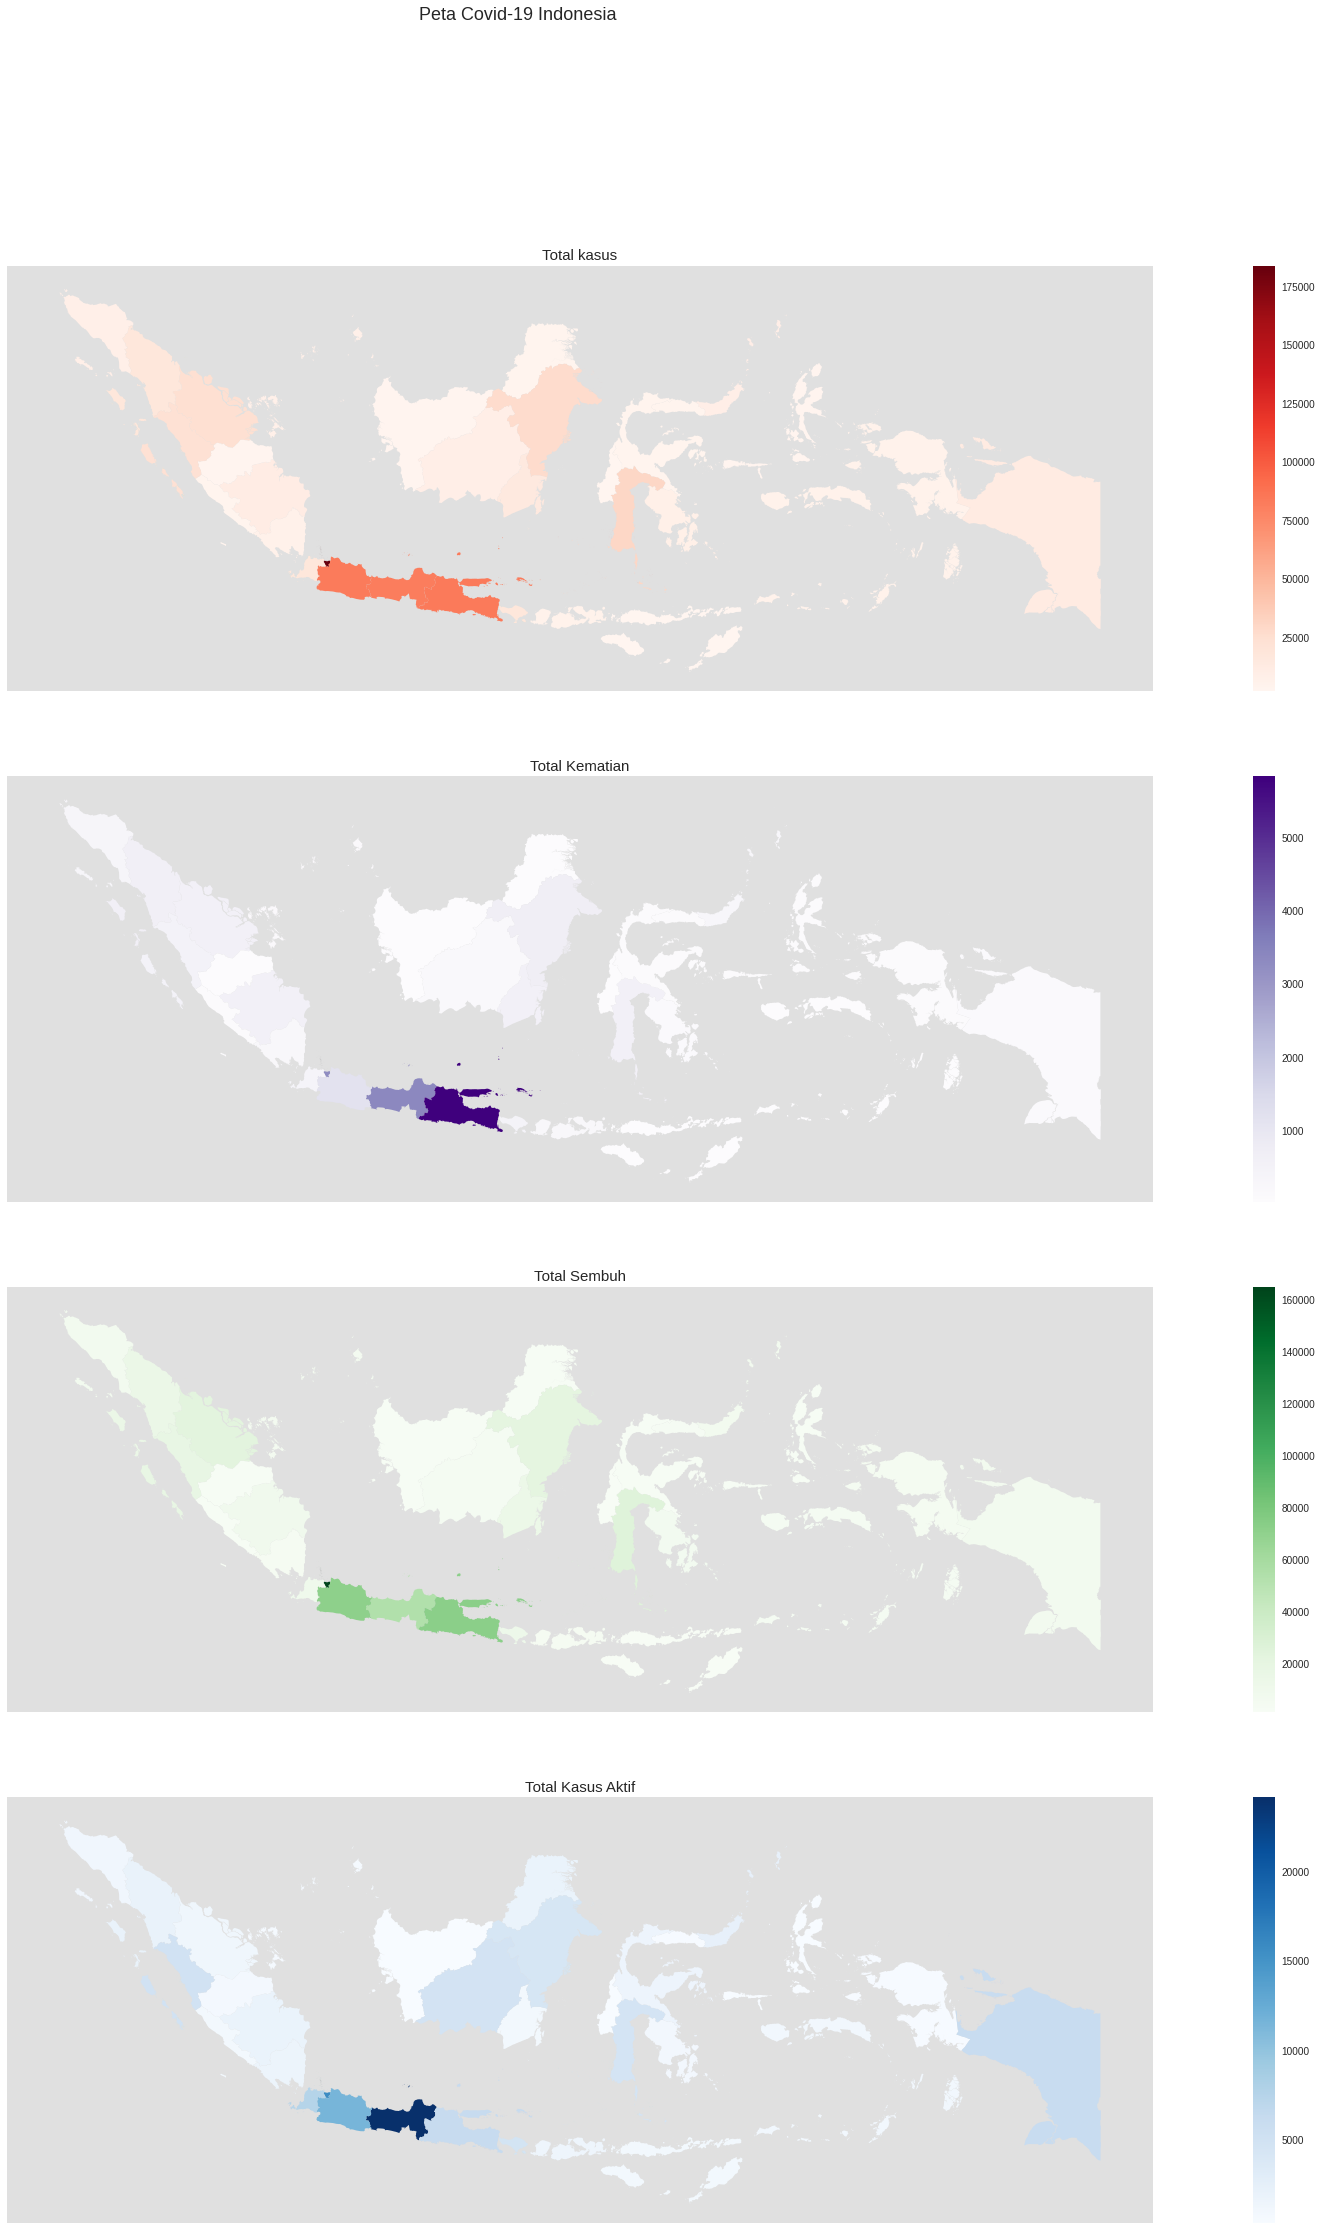

In [ ]:
fig,ax = plt.subplots(4,figsize=(36,36))
plt.style.use('seaborn')
covid_peta.plot(column='Total Cases',cmap='Reds',figsize=(9,36),legend=True,ax=ax[0])
ax[0].set_title('Total kasus',fontsize=15)
covid_peta.plot(column='Total Deaths',cmap='Purples',figsize=(9,36),legend=True,ax=ax[1])
ax[1].set_title('Total Kematian',fontsize=15)
covid_peta.plot(column='Total Recovered',cmap='Greens',figsize=(9,36),legend=True,ax=ax[2])
ax[2].set_title('Total Sembuh',fontsize=15)
covid_peta.plot(column='Total Active Cases',cmap='Blues',figsize=(9,36),legend=True,ax=ax[3])
ax[3].set_title('Total Kasus Aktif',fontsize=15)

#add background color
ax[0].set_facecolor('#e0e0e0')
ax[1].set_facecolor('#e0e0e0')
ax[2].set_facecolor('#e0e0e0')
ax[3].set_facecolor('#e0e0e0')

for i in np.arange(4):
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['left'].set_visible(False)
    ax[i].spines['bottom'].set_visible(False)
    for item in ax[i].get_xticklabels():
        item.set_visible(False)
    for item in ax[i].get_yticklabels():
        item.set_visible(False)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
fig.suptitle('Peta Covid-19 Indonesia', fontsize=18)
fig.savefig('/content/Peta Covid-19 Indonesia.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

Top 10 Provinsi dengan Kasus Terbanyak

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


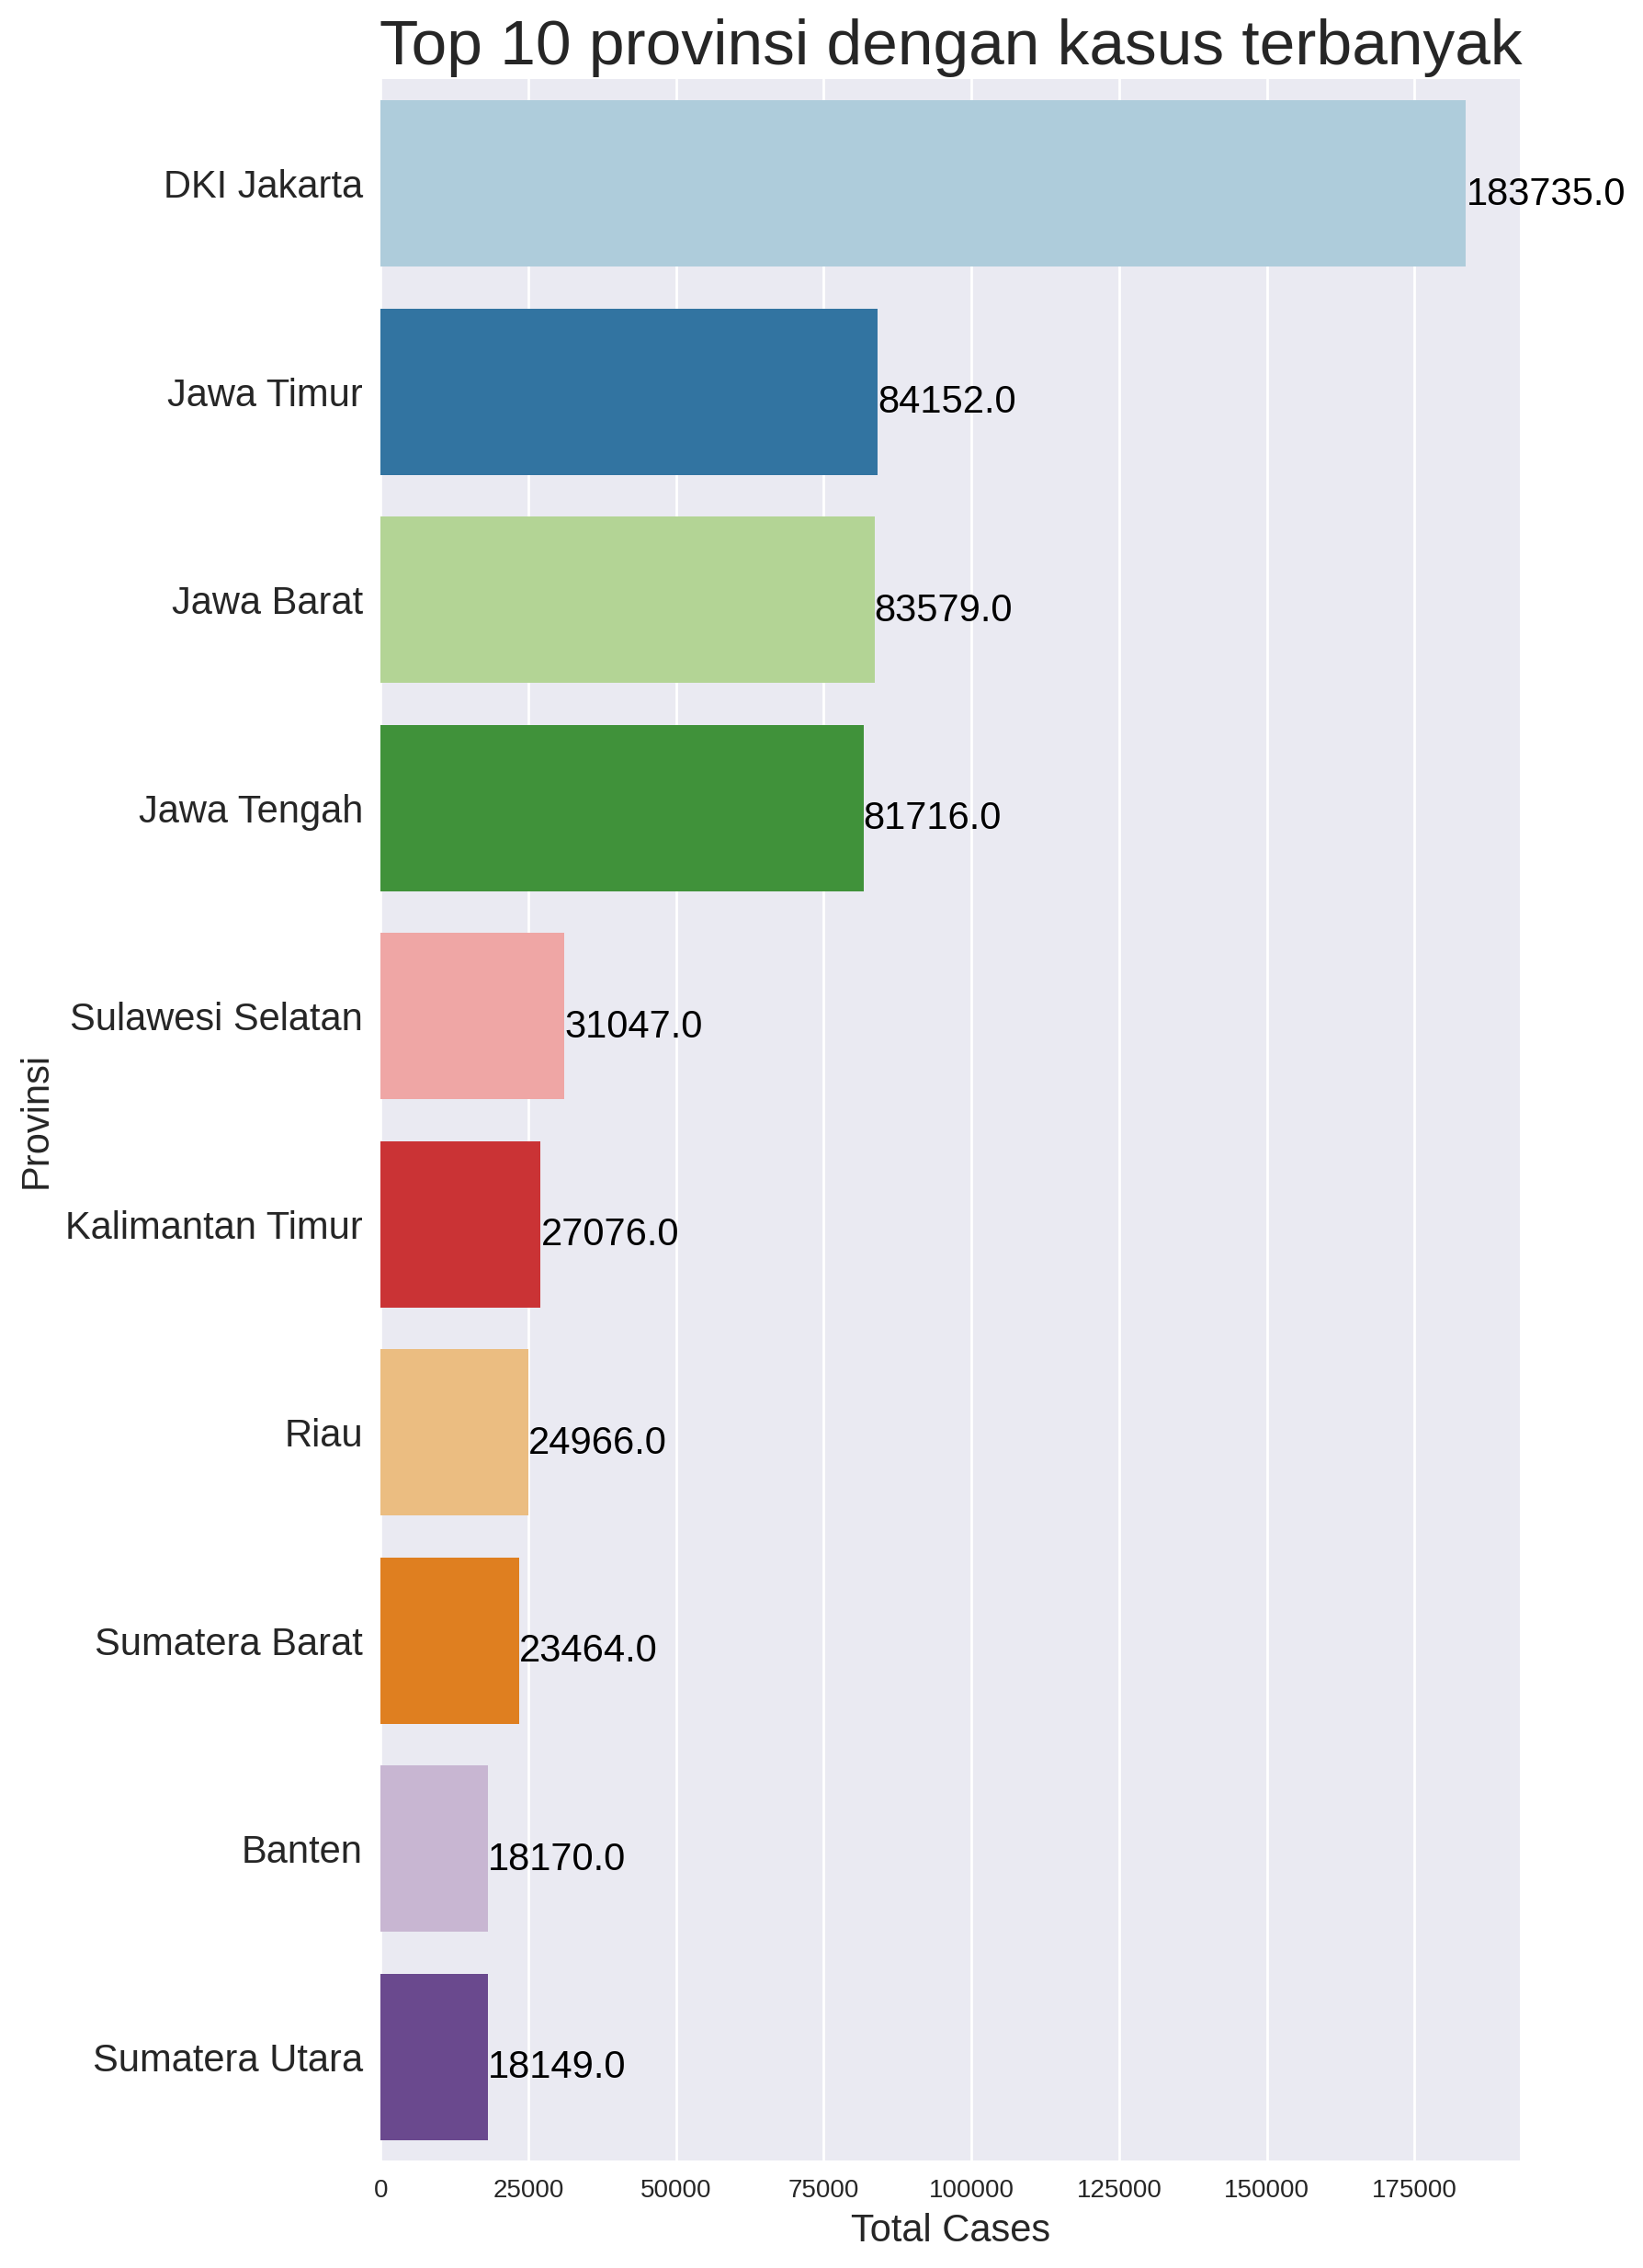

In [ ]:
total_cases = covid_peta.sort_values(by=['Total Cases'], ascending=False)
total_cases = total_cases[0:10]
plt.figure(figsize=(8,15),dpi=200)
ax = sns.barplot(total_cases['Total Cases'], total_cases['Provinsi'],palette='Paired')
plt.xlabel("Total Cases",fontsize = 15)
plt.ylabel("Provinsi",fontsize = 15)
plt.title('Top 10 provinsi dengan kasus terbanyak',fontsize = 25)
ax.set_yticklabels(textwrap.fill(y.get_text()) for y in ax.get_yticklabels())
ax.tick_params(axis="y", labelsize=15)
for i in ax.patches:
    ax.text(i.get_width() + .05, i.get_y() + 0.5, str(i.get_width()), fontsize = 15, color = 'black')
plt.show()


Top 10 Provinsi dengan kematian karna covid-19 Terbanyak

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


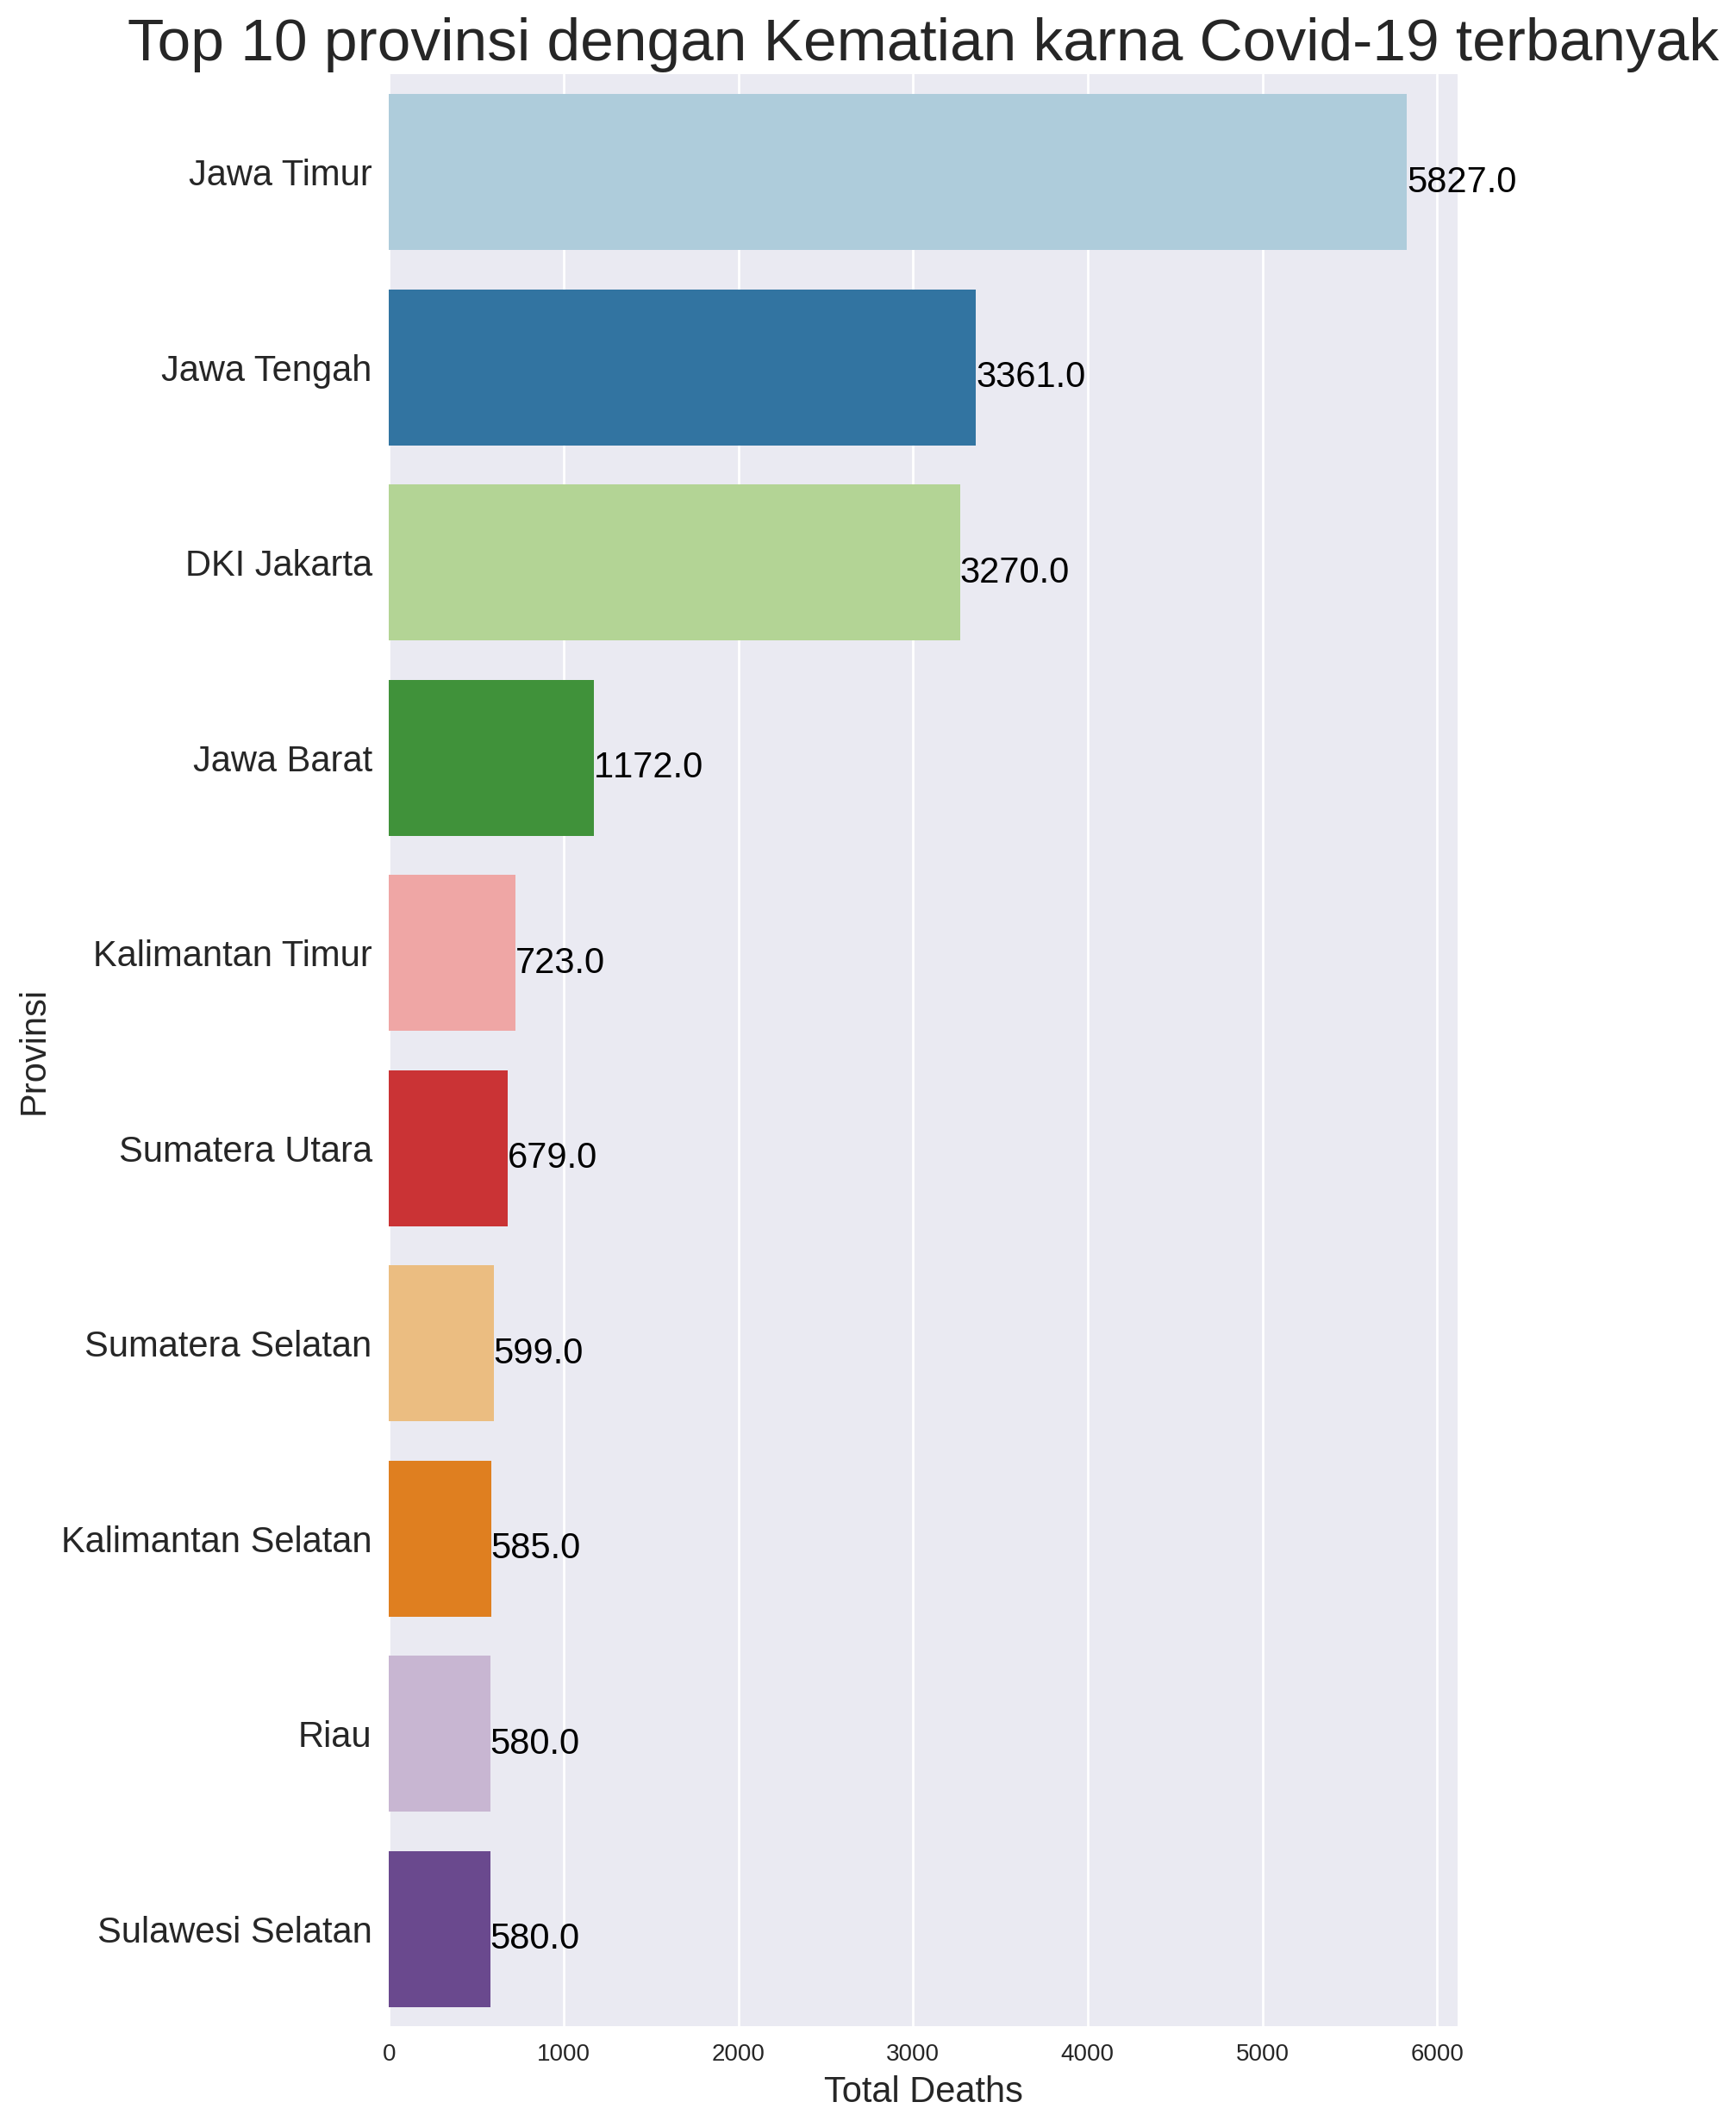

In [ ]:
total_death = covid_peta.sort_values(by=['Total Deaths'], ascending=False)
total_death = total_death[0:10]
plt.figure(figsize=(8,15),dpi=200)
ax = sns.barplot(total_death['Total Deaths'], total_death['Provinsi'],palette='Paired')
plt.xlabel("Total Deaths",fontsize = 15)
plt.ylabel("Provinsi",fontsize = 15)
plt.title('Top 10 provinsi dengan Kematian karna Covid-19 terbanyak',fontsize = 25)
ax.set_yticklabels(textwrap.fill(y.get_text()) for y in ax.get_yticklabels())
ax.tick_params(axis="y", labelsize=15)
for i in ax.patches:
    ax.text(i.get_width() + .05, i.get_y() + 0.5, str(i.get_width()), fontsize = 15, color = 'black')
plt.show()


Top 10 Provinsi dengan kesembuhan dari covid-19 Terbanyak

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


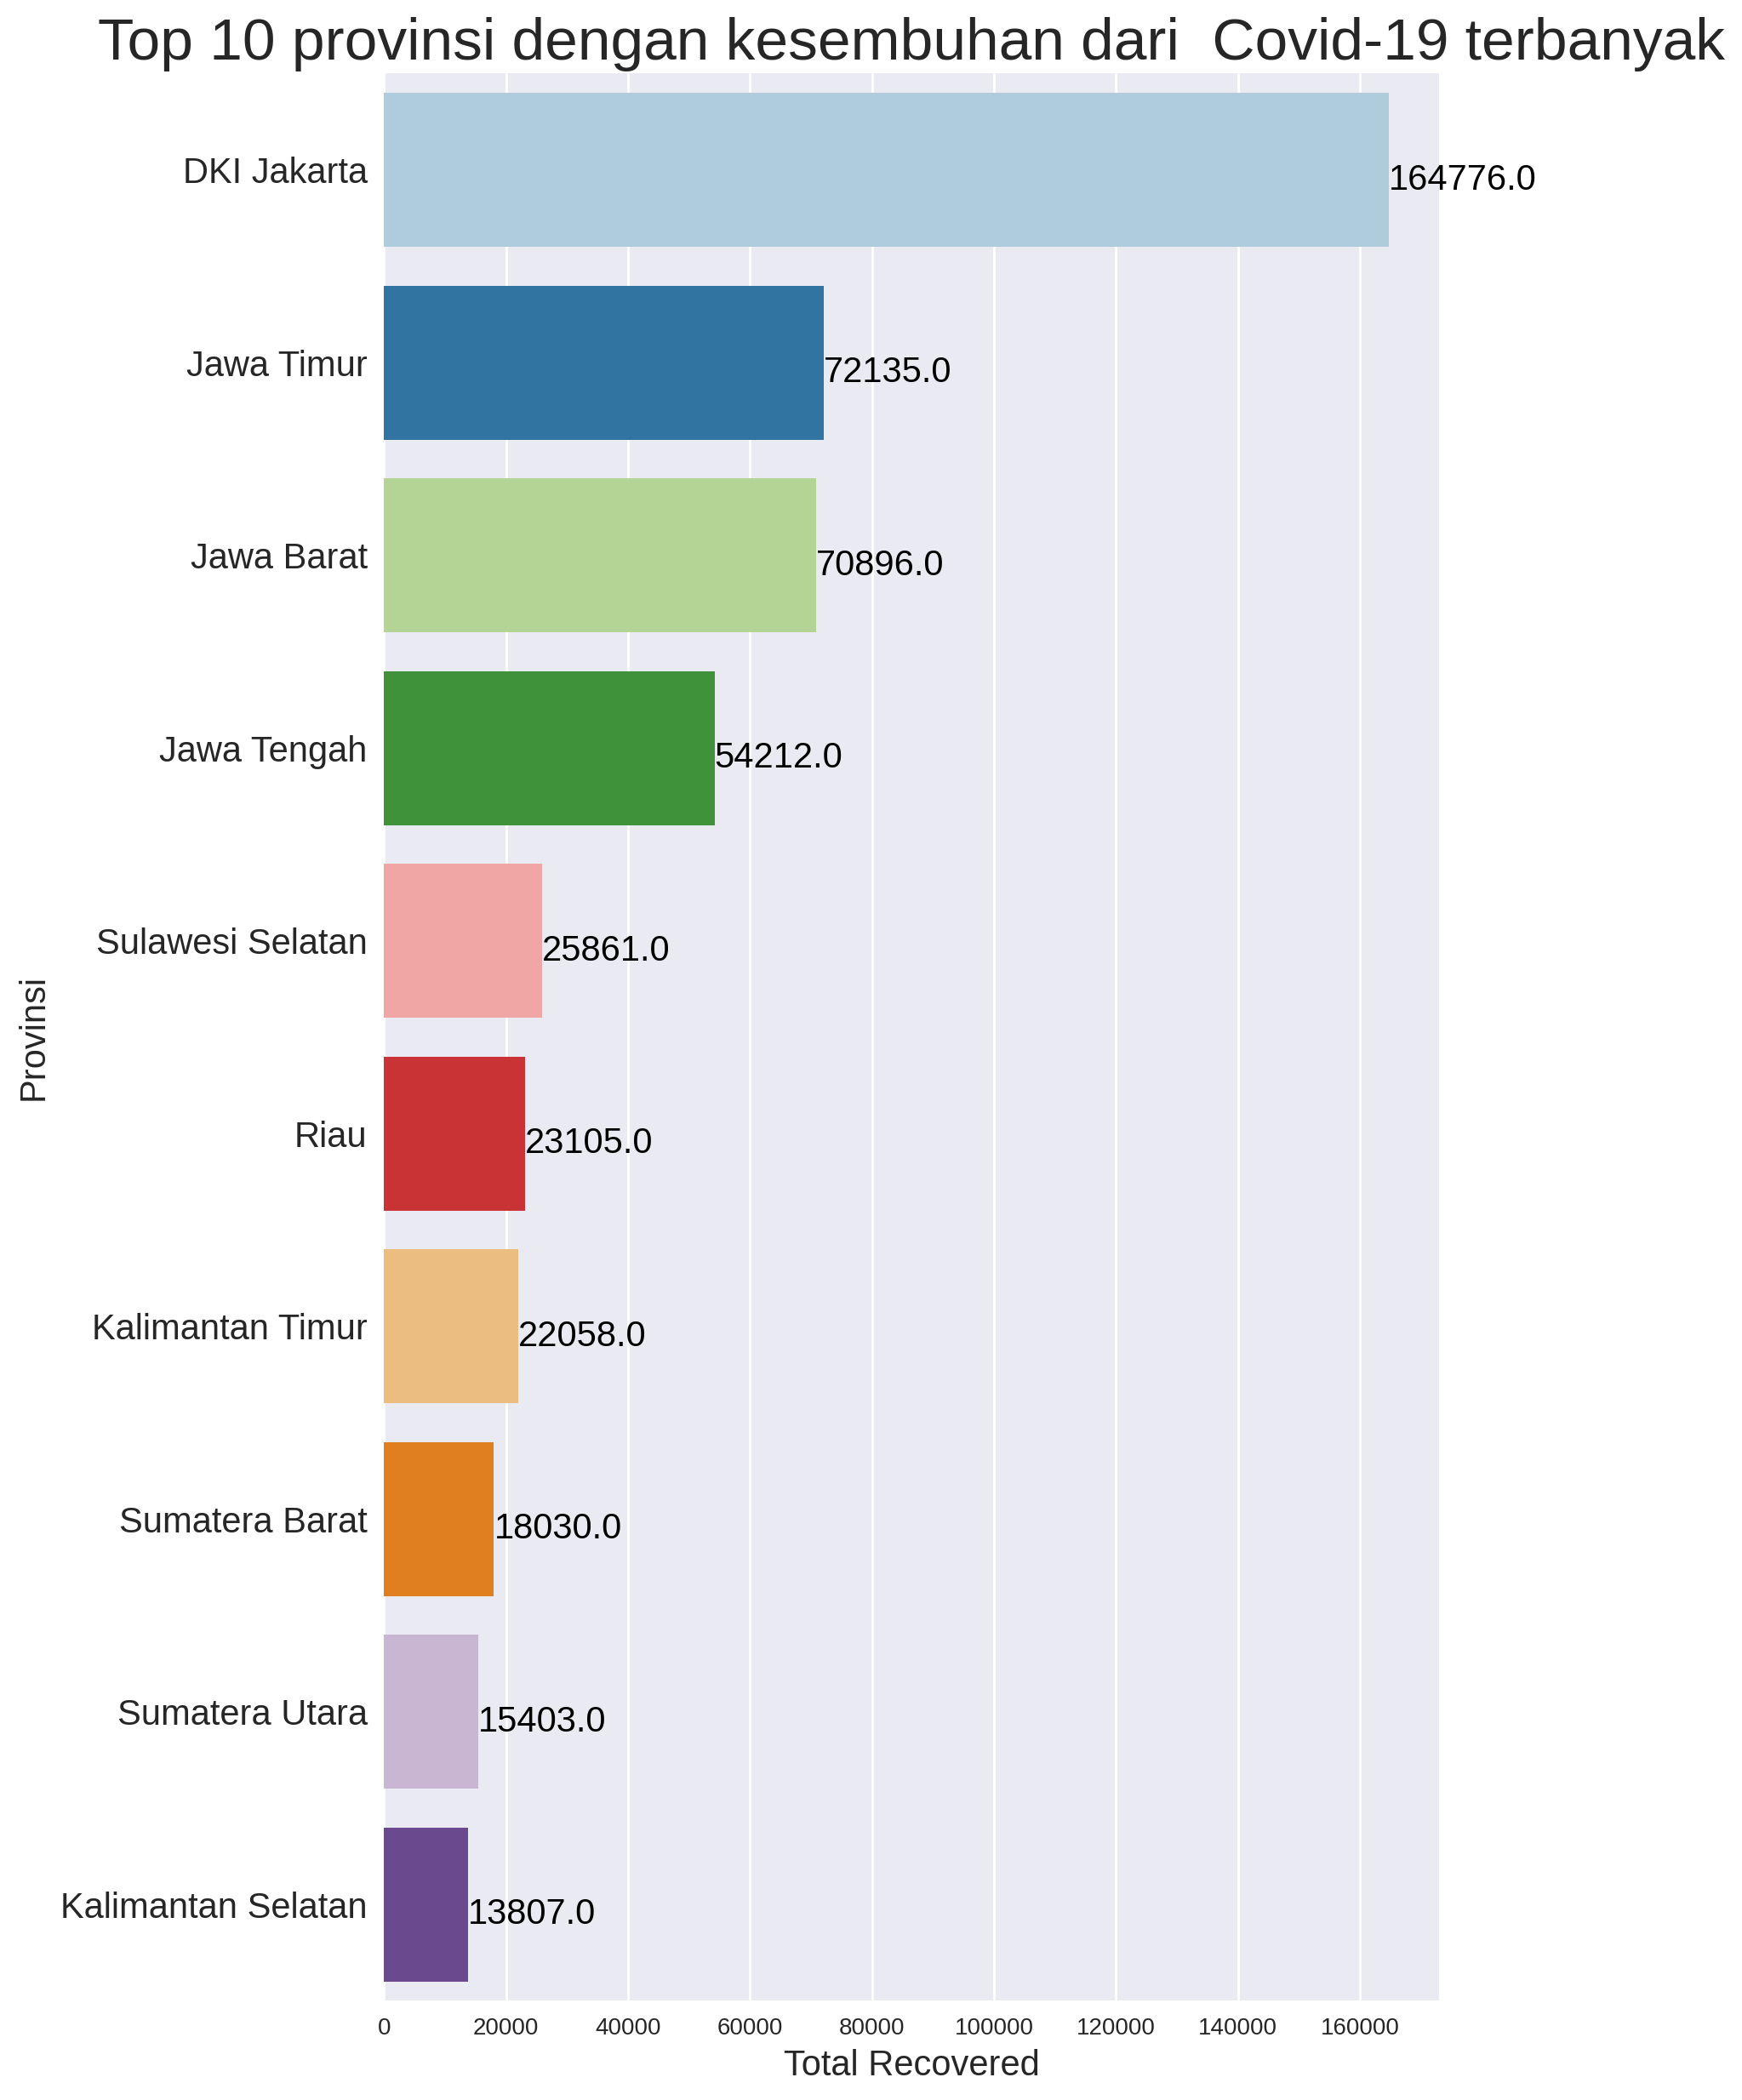

In [ ]:
total_recovery = covid_peta.sort_values(by=['Total Recovered'], ascending=False)
total_recovery = total_recovery[0:10]
plt.figure(figsize=(8,15),dpi=200)
ax = sns.barplot(total_recovery['Total Recovered'], total_recovery['Provinsi'],palette='Paired')
plt.xlabel("Total Recovered",fontsize = 15)
plt.ylabel("Provinsi",fontsize = 15)
plt.title('Top 10 provinsi dengan kesembuhan dari  Covid-19 terbanyak',fontsize = 25)
ax.set_yticklabels(textwrap.fill(y.get_text()) for y in ax.get_yticklabels())
ax.tick_params(axis="y", labelsize=15)
for i in ax.patches:
    ax.text(i.get_width() + .05, i.get_y() + 0.5, str(i.get_width()), fontsize = 15, color = 'black')
plt.show()


Top 10 Provinsi dengan kasus aktif covid-19 Terbanyak

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


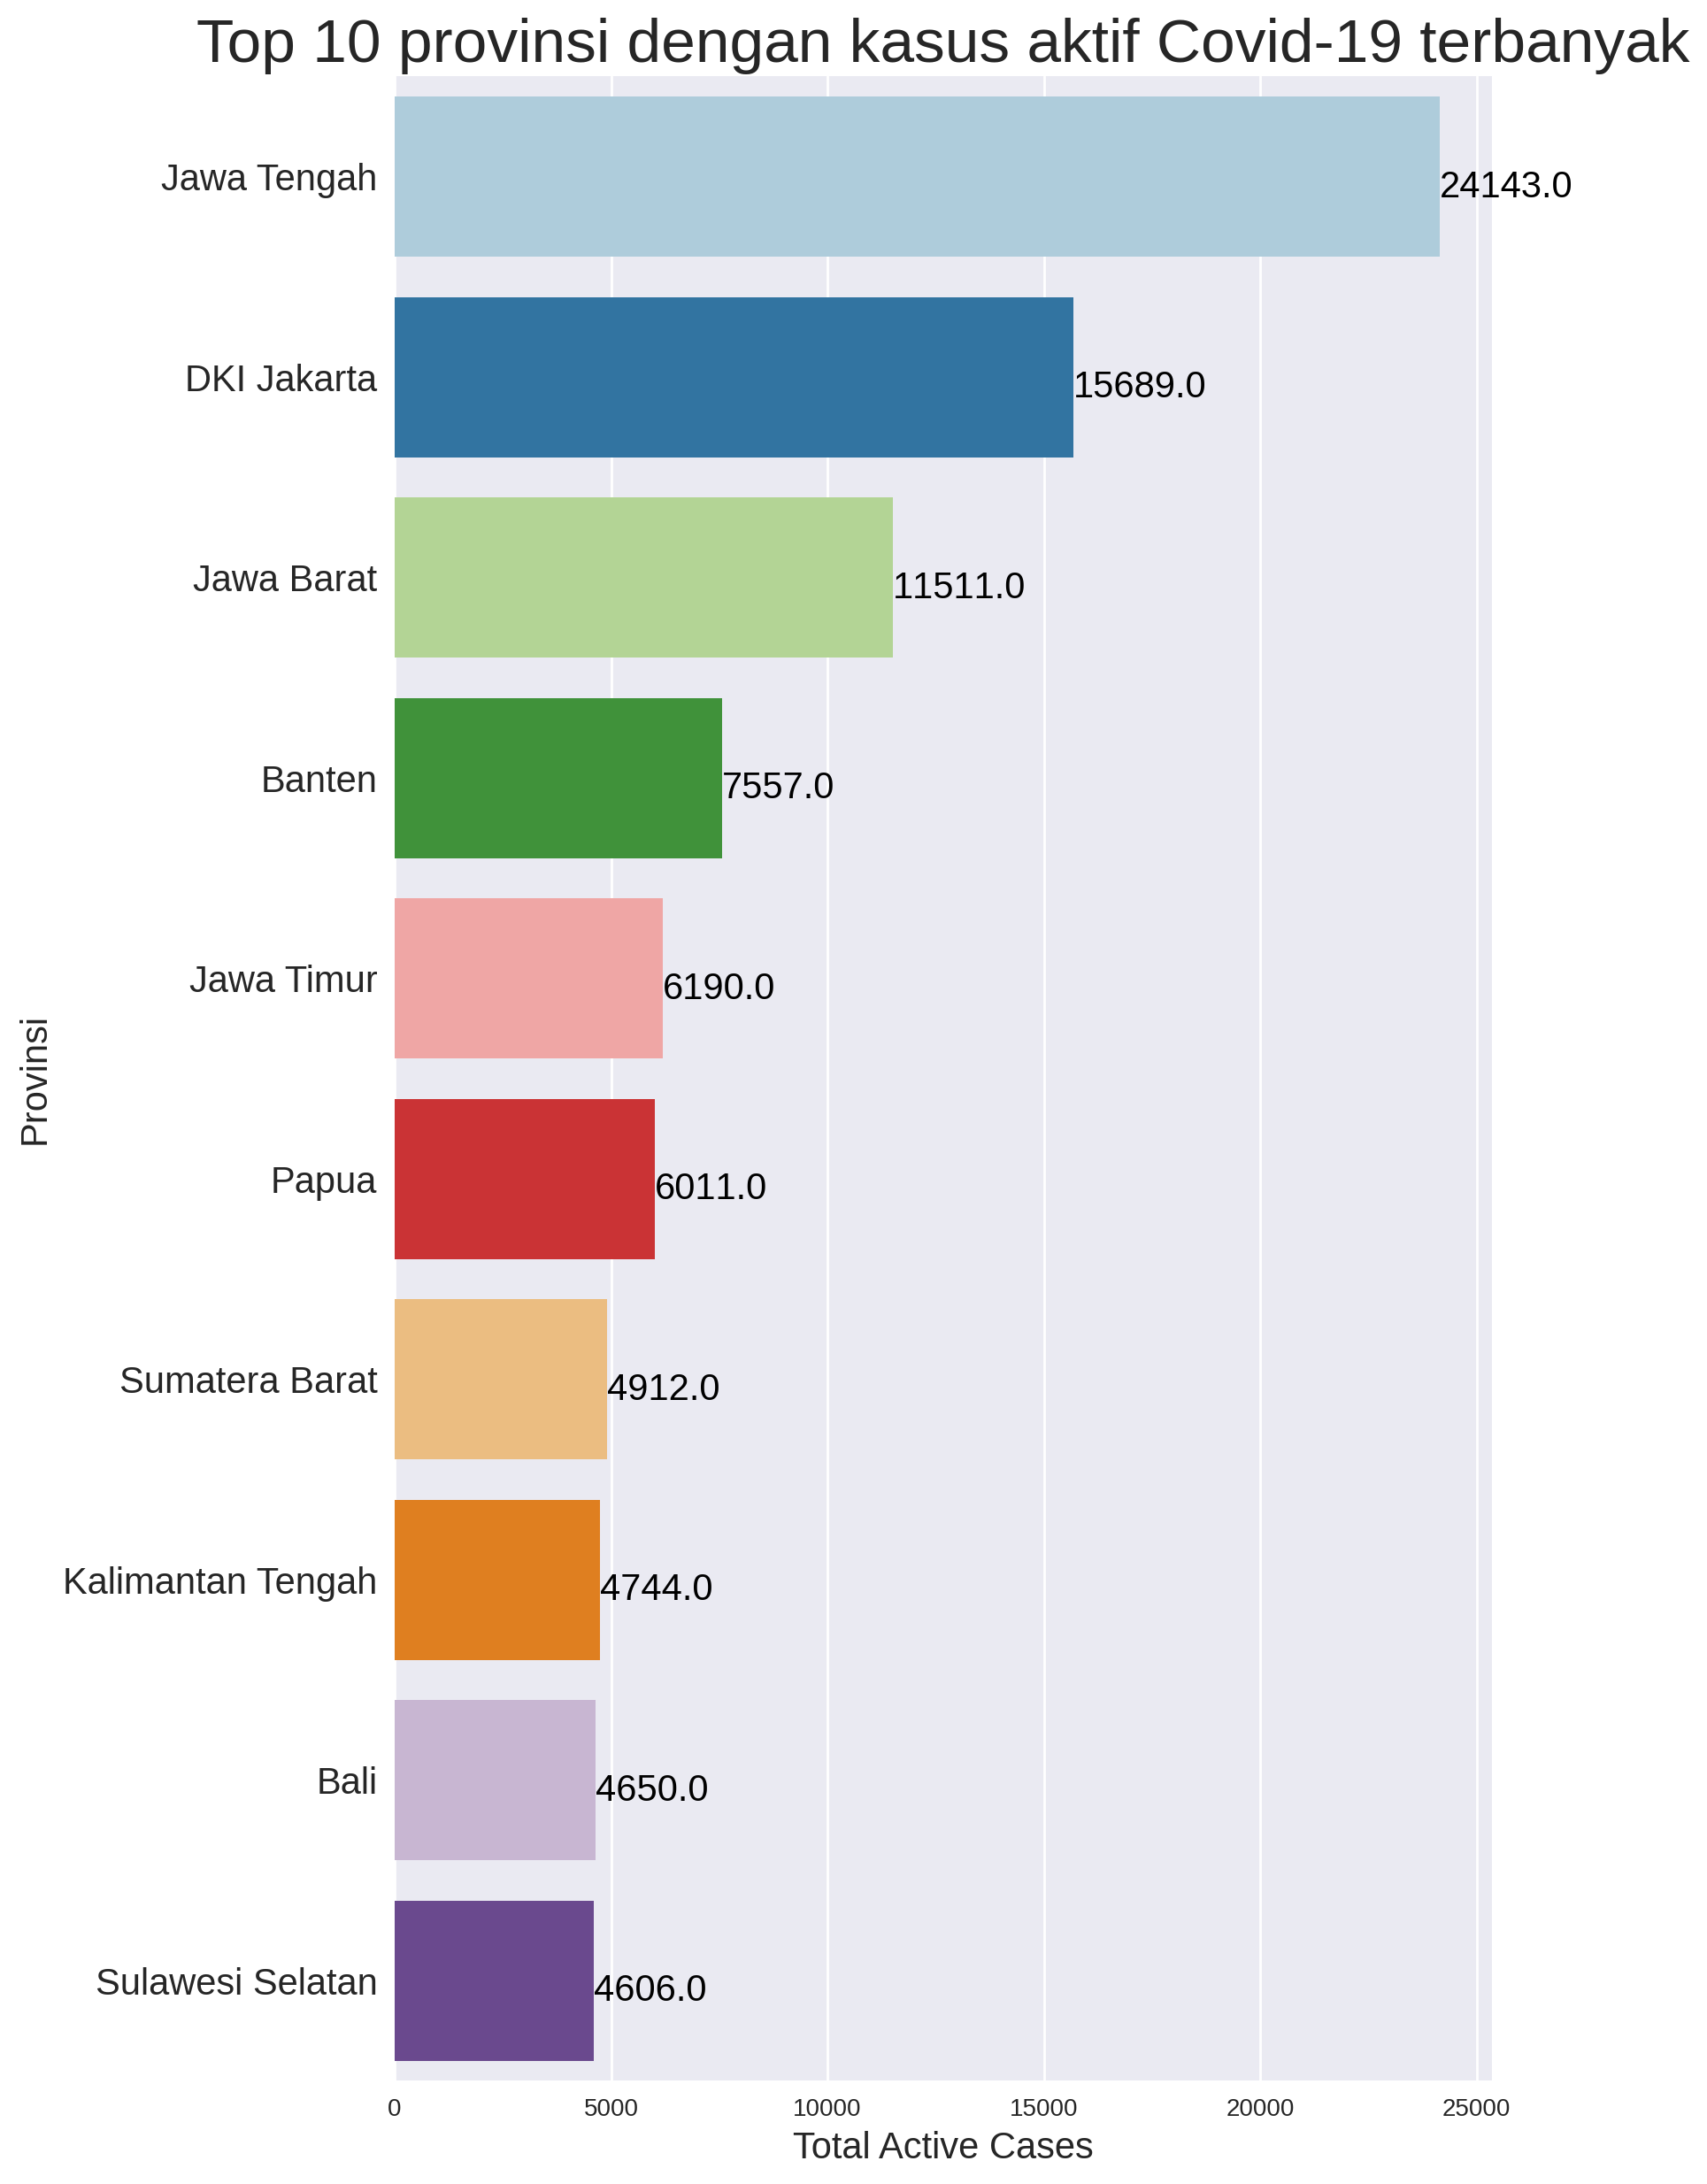

In [ ]:
total_active_cases = covid_peta.sort_values(by=['Total Active Cases'], ascending=False)
total_active_cases = total_active_cases[0:10]
plt.figure(figsize=(8,15),dpi=200)
ax = sns.barplot(total_active_cases['Total Active Cases'], total_active_cases['Provinsi'],palette='Paired')
plt.xlabel("Total Active Cases",fontsize = 15)
plt.ylabel("Provinsi",fontsize = 15)
plt.title('Top 10 provinsi dengan kasus aktif Covid-19 terbanyak',fontsize = 25)
ax.set_yticklabels(textwrap.fill(y.get_text()) for y in ax.get_yticklabels())
ax.tick_params(axis="y", labelsize=15)
for i in ax.patches:
    ax.text(i.get_width() + .05, i.get_y() + 0.5, str(i.get_width()), fontsize = 15, color = 'black')
plt.show()
